### EDA - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# import CSV file

df = pd.read_csv(r'C:\Users\salim\Downloads/project dataset.csv')

In [41]:
df.shape

(1271, 39)

In [42]:
df.head()

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,STATE,...,BP CATEGORY,Document Type,TRANSPORTER NAME,U_GRNNO,Loading/Unloading,Detention,KITITEM,U_AssetClass,Customer Type,U_TRINPD
0,12/6/2019,12/6/2019,12/6/2019,10000237,HCCL,FMCG,West,RENTAL,Ahmedabad,Gujarat,...,Beverage,Allot,LOGISTICS TECK LLP,NaN,NaN,NaN,NaN,Wooden Pallet,NaN,NaN
1,12/6/2019,12/6/2019,12/6/2019,10000237,HCCL,FMCG,West,RENTAL,Ahmedabad,Gujarat,...,Beverage,Allot,LOGISTICS TECK LLP,NaN,NaN,NaN,NaN,Wooden Pallet,NaN,NaN
2,12/6/2019,12/6/2019,12/6/2019,10000237,HCCL,FMCG,West,RENTAL,Ahmedabad,Gujarat,...,Beverage,Allot,LOGISTICS TECK LLP,NaN,NaN,NaN,NaN,Wooden Pallet,NaN,NaN
3,12/6/2019,12/6/2019,12/6/2019,10000237,HCCL,FMCG,West,RENTAL,Ahmedabad,Gujarat,...,Beverage,Allot,LOGISTICS TECK LLP,NaN,NaN,NaN,NaN,Wooden Pallet,NaN,NaN
4,12/17/2019,12/17/2019,12/17/2019,10000237,HCCL,FMCG,West,RENTAL,Ahmedabad,Gujarat,...,Beverage,Allot,LOGISTICS TECK LLP,NaN,0.0,NaN,NaN,Wooden Pallet,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   POSTING DATE          1271 non-null   object 
 1   EFFECTIVE DATE        1271 non-null   object 
 2   CREATE DATE           1271 non-null   object 
 3   Customer/Vendor Code  1271 non-null   int64  
 4   Customer/Vendor Name  1271 non-null   object 
 5   LOB                   1271 non-null   object 
 6   Region                1271 non-null   object 
 7   BP TYPE               1271 non-null   object 
 8   City                  1271 non-null   object 
 9   STATE                 1271 non-null   object 
 10  From WhsCode          1271 non-null   object 
 11  From WhsName          1271 non-null   object 
 12  To whsCode            1271 non-null   int64  
 13  TO WhsName            1271 non-null   object 
 14  Model TYPE            1271 non-null   object 
 15  Transfer Type        

In [45]:
# check for null values
pd.isnull(df).sum()

POSTING DATE               0
EFFECTIVE DATE             0
CREATE DATE                0
Customer/Vendor Code       0
Customer/Vendor Name       0
LOB                        0
Region                     0
BP TYPE                    0
City                       0
STATE                      0
From WhsCode               0
From WhsName               0
To whsCode                 0
TO WhsName                 0
Model TYPE                 0
Transfer Type              0
U_Frt                     28
U_ActShipType              0
PRODUCT CATEGORY           0
ItemCode                   0
Description                0
QUANTITY                   0
UNIT                       0
RATE                       0
SO ID                      0
SO Creation Date           0
SO Due Date                0
U_DocStatus                0
U_SOTYPE                   0
BP CATEGORY                0
Document Type              0
TRANSPORTER NAME           0
U_GRNNO                 1229
Loading/Unloading        467
Detention     

In [46]:
# drop unrelated/blank columns

df.drop(['U_GRNNO','Loading/Unloading','Detention','KITITEM','Customer Type','U_TRINPD'],axis = 1,inplace = True)

In [69]:
# check for null values
pd.isnull(df).sum().sort_values(ascending = False)

U_Frt                   28
U_AssetClass             8
CREATE DATE              0
PRODUCT CATEGORY         0
TRANSPORTER NAME         0
Document Type            0
BP CATEGORY              0
U_SOTYPE                 0
U_DocStatus              0
SO Due Date              0
SO Creation Date         0
SO ID                    0
RATE                     0
UNIT                     0
QUANTITY                 0
Description              0
ItemCode                 0
U_ActShipType            0
Customer/Vendor Code     0
EFFECTIVE DATE           0
Transfer Type            0
Model TYPE               0
TO WhsName               0
To whsCode               0
From WhsName             0
From WhsCode             0
STATE                    0
City                     0
BP TYPE                  0
Region                   0
LOB                      0
Customer/Vendor Name     0
POSTING DATE             0
dtype: int64

In [70]:
# Change datatype
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'Description', 'QUANTITY', 'UNIT',
       'RATE', 'SO ID', 'SO Creation Date', 'SO Due Date', 'U_DocStatus',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'TRANSPORTER NAME',
       'U_AssetClass'],
      dtype='object')

In [71]:
df.describe()

,Customer/Vendor Code,To whsCode,U_Frt,RATE
count,1271.0,1271.0,1243.000000,1271.000000
mean,10000237.0,10000237.0,648.036203,1594.593525
std,0.0,0.0,4521.888662,764.698170
min,10000237.0,10000237.0,0.000000,29.250000
25%,10000237.0,10000237.0,0.000000,370.000000
50%,10000237.0,10000237.0,6.000000,2060.000000
75%,10000237.0,10000237.0,15.000000,2060.000000
max,10000237.0,10000237.0,127433.000000,2625.000000


In [72]:
# use describe() for specific columns
df[['U_Frt','RATE']].describe()

,U_Frt,RATE
count,1243.000000,1271.000000
mean,648.036203,1594.593525
std,4521.888662,764.698170
min,0.000000,29.250000
25%,0.000000,370.000000
50%,6.000000,2060.000000
75%,15.000000,2060.000000
max,127433.000000,2625.000000


In [73]:
df[['Customer/Vendor Code','To whsCode','U_Frt','RATE']].describe()

,Customer/Vendor Code,To whsCode,U_Frt,RATE
count,1271.0,1271.0,1243.000000,1271.000000
mean,10000237.0,10000237.0,648.036203,1594.593525
std,0.0,0.0,4521.888662,764.698170
min,10000237.0,10000237.0,0.000000,29.250000
25%,10000237.0,10000237.0,0.000000,370.000000
50%,10000237.0,10000237.0,6.000000,2060.000000
75%,10000237.0,10000237.0,15.000000,2060.000000
max,10000237.0,10000237.0,127433.000000,2625.000000


### Exploratory Data Analysis

### Category Based Analysis

### PRODUCT CATEGORY

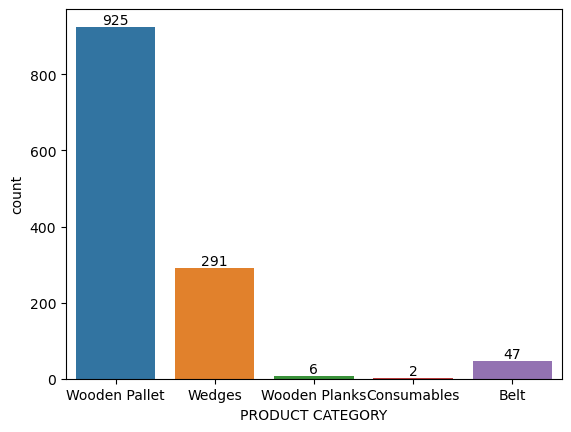

In [75]:
ax = sns.countplot(x = 'PRODUCT CATEGORY',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='PRODUCT CATEGORY', ylabel='RATE'>

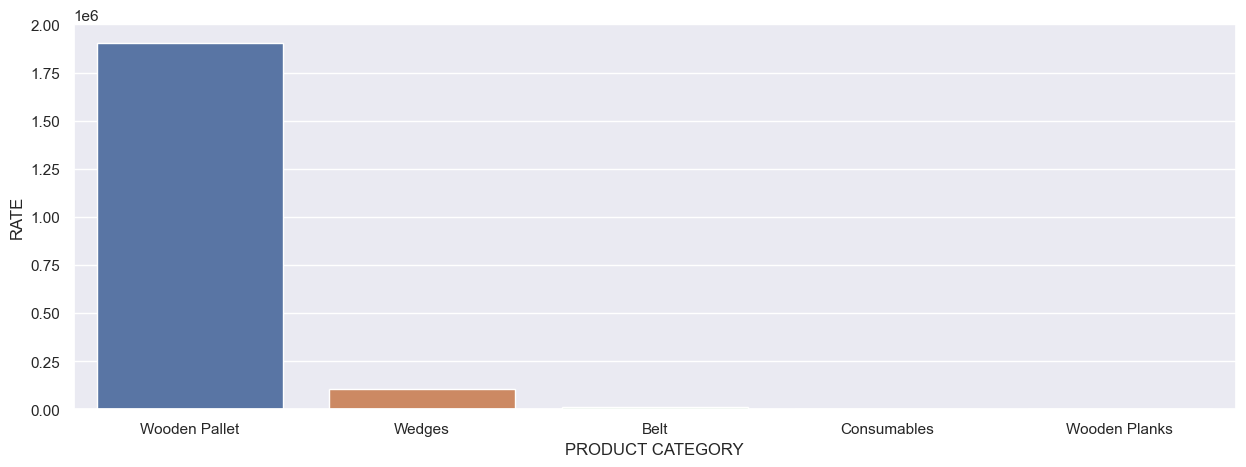

In [86]:
sales_state = df.groupby(['PRODUCT CATEGORY'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='PRODUCT CATEGORY',y = 'RATE')

### From above graphs we can see that most of the sold products are from Wooden Pallet

### TOP_TRANSPORTER_NAME

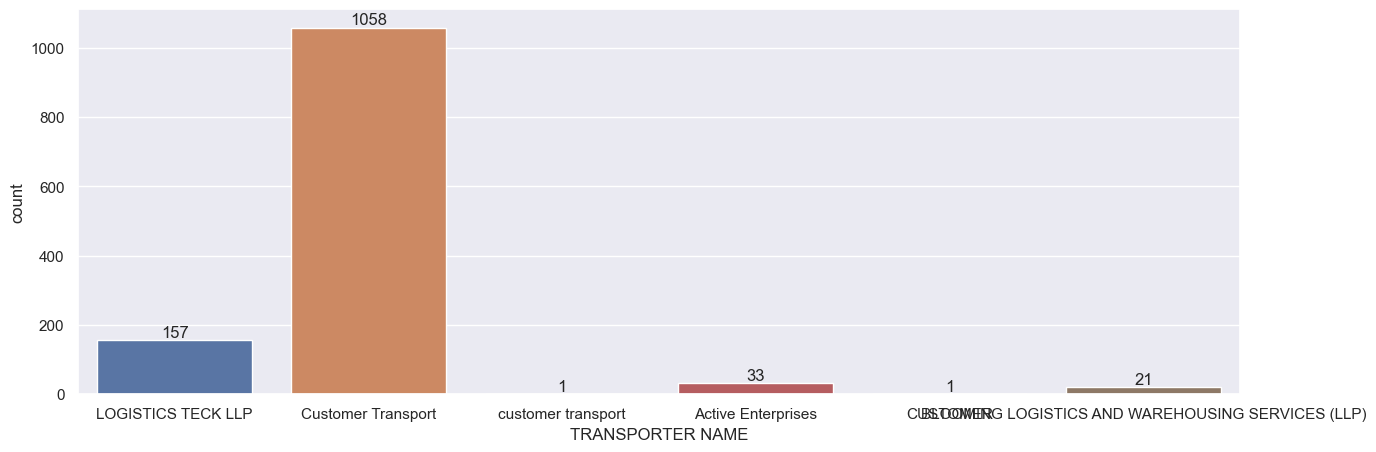

In [87]:
ax = sns.countplot(data=df,x = 'TRANSPORTER NAME')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='TRANSPORTER NAME', ylabel='RATE'>

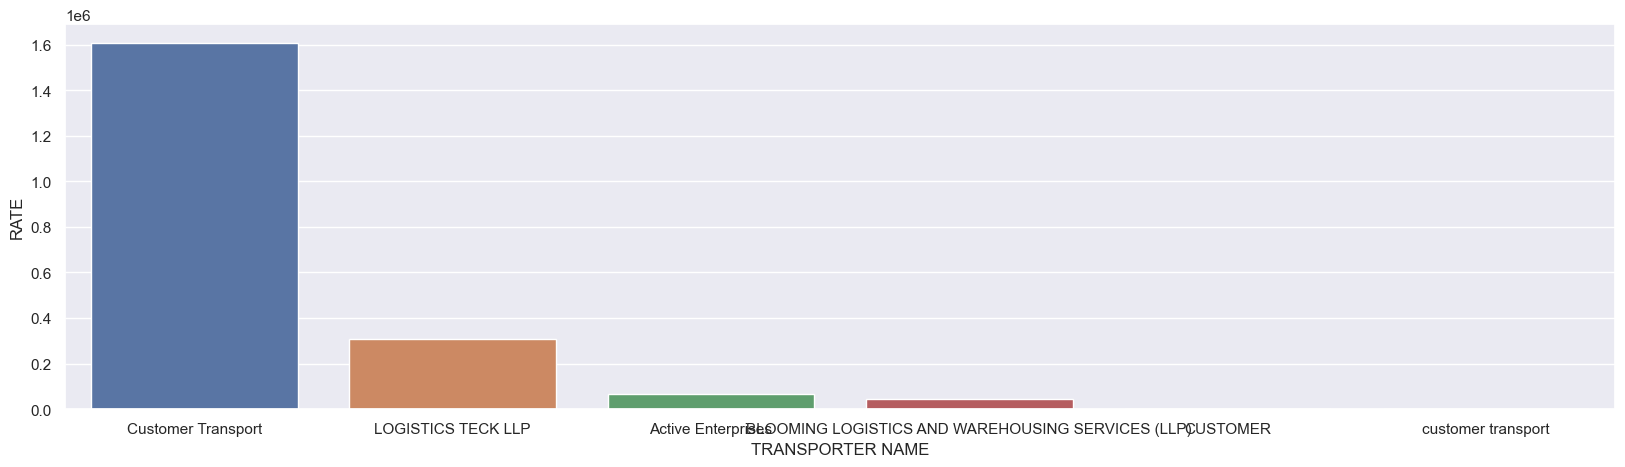

In [91]:
Top_Transporter = df.groupby(['TRANSPORTER NAME'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Top_Transporter,x='TRANSPORTER NAME',y = 'RATE')

### From above graphs we can see that most of the revenue generate from the customer transport.

### From Warehouse Name

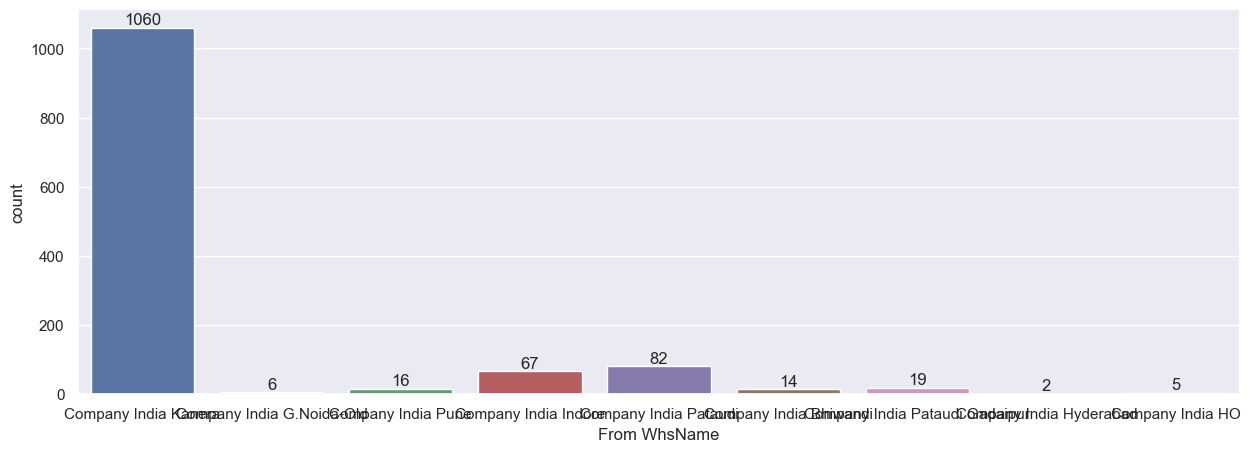

In [109]:
ax = sns.countplot(data=df,x = 'From WhsName')

sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='From WhsName', ylabel='RATE'>

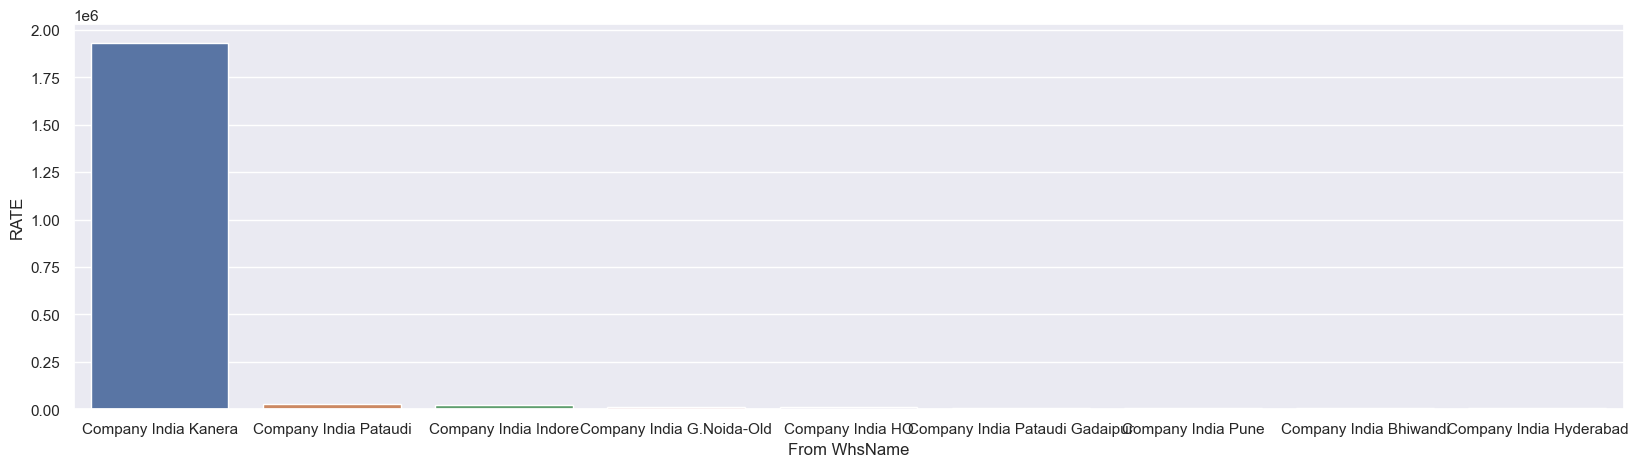

In [110]:
sales_state = df.groupby(['From WhsName'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state,x='From WhsName',y = 'RATE')

### From above graph we can see that the top performing warehouse name is Company India Kanera as compare to others.

### Model Type

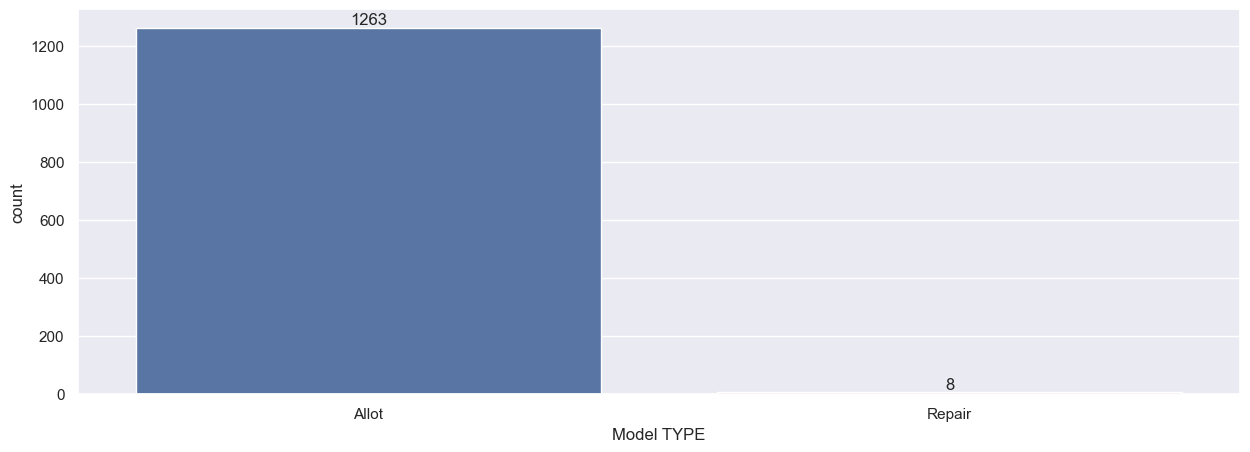

In [107]:
ax = sns.countplot(x = 'Model TYPE',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Model TYPE', ylabel='RATE'>

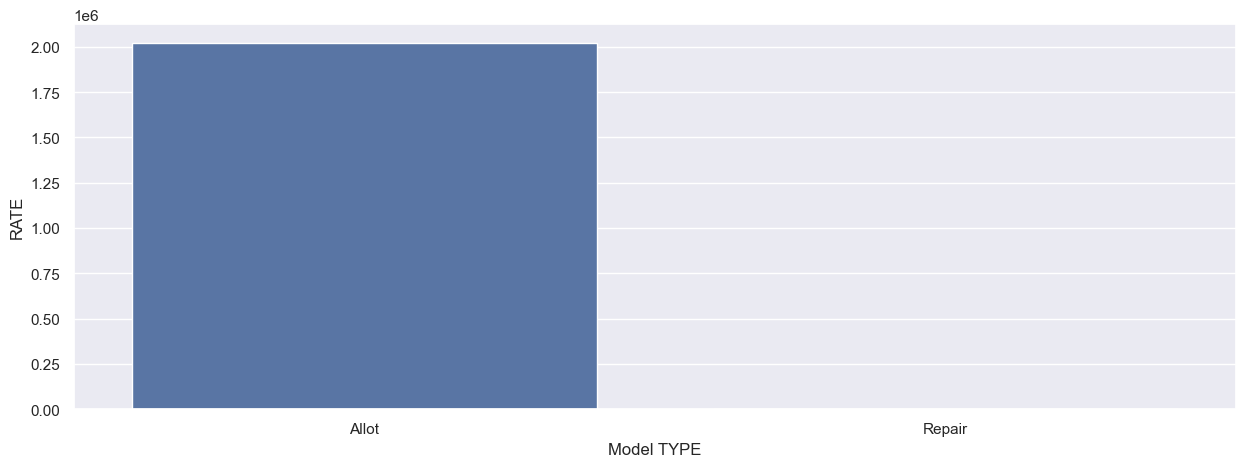

In [108]:
sales_state = df.groupby(['Model TYPE'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='Model TYPE',y = 'RATE')

### From above graph we can see that the most performing modeltype is allot as compare to others.

### U_ActShipType

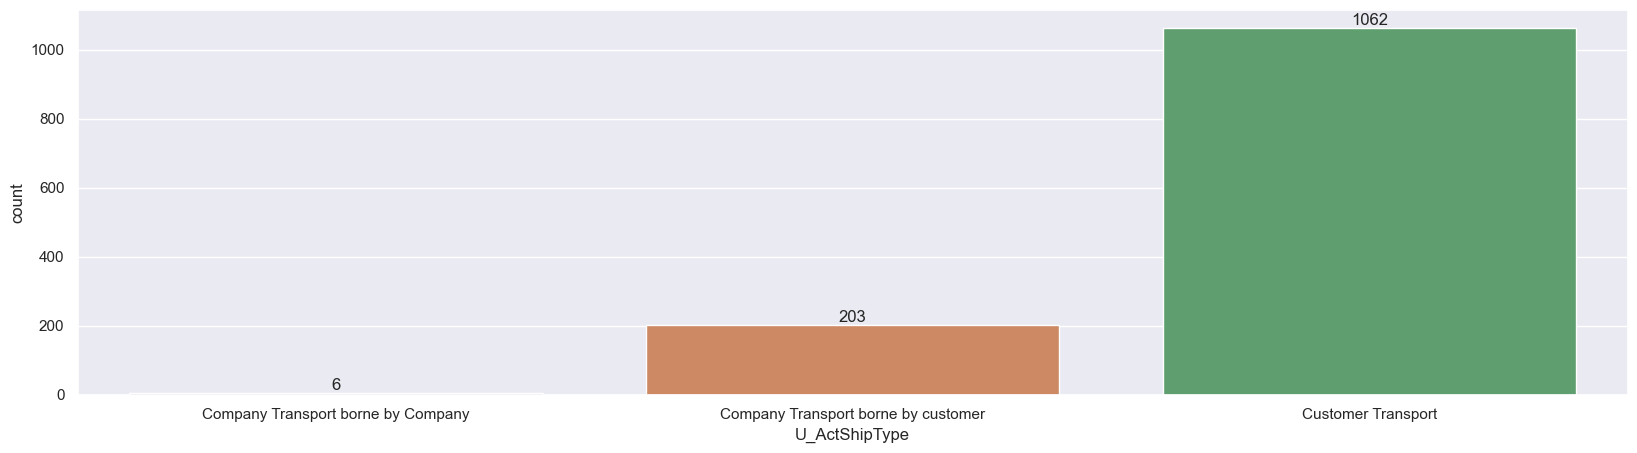

In [112]:
ax = sns.countplot(x = 'U_ActShipType',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='U_ActShipType', ylabel='RATE'>

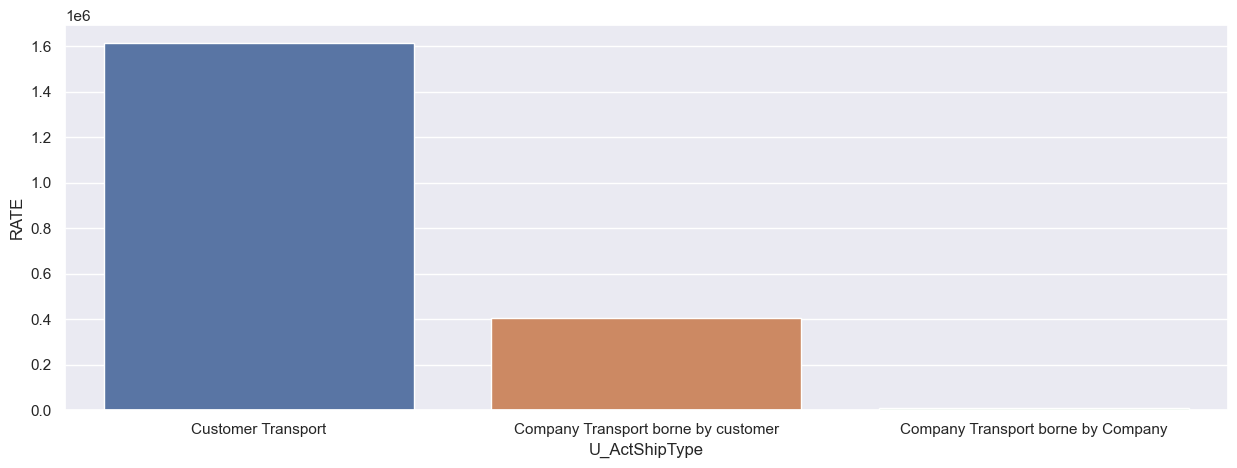

In [117]:
sales_state = df.groupby(['U_ActShipType'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='U_ActShipType',y = 'RATE')

### From above graph we can see that the most performing models U_ActShipType is customer Transport as compare to others.

### Time Based Analysis

### Posting_Date

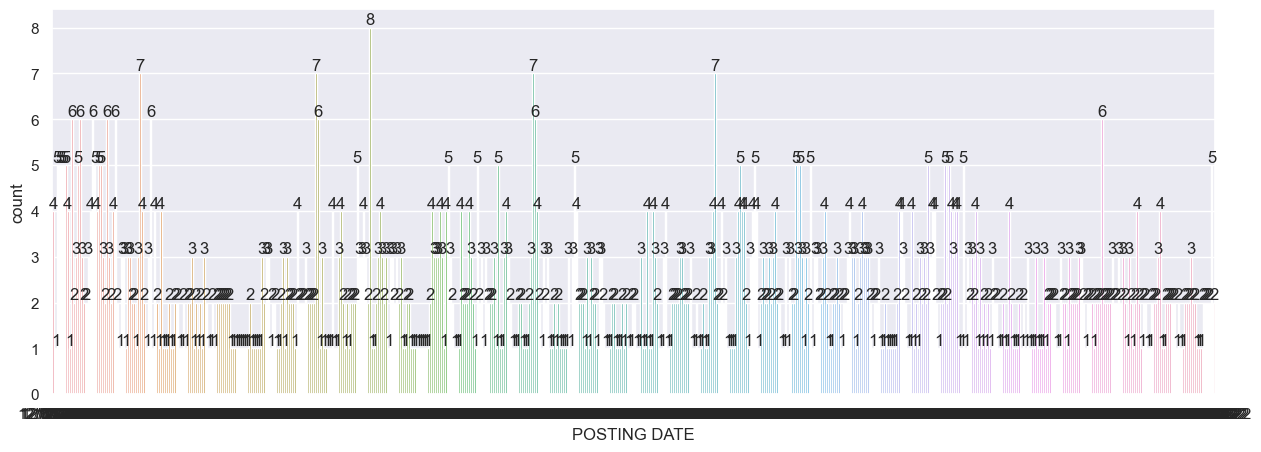

In [122]:
ax = sns.countplot(x = 'POSTING DATE',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='POSTING DATE', ylabel='RATE'>

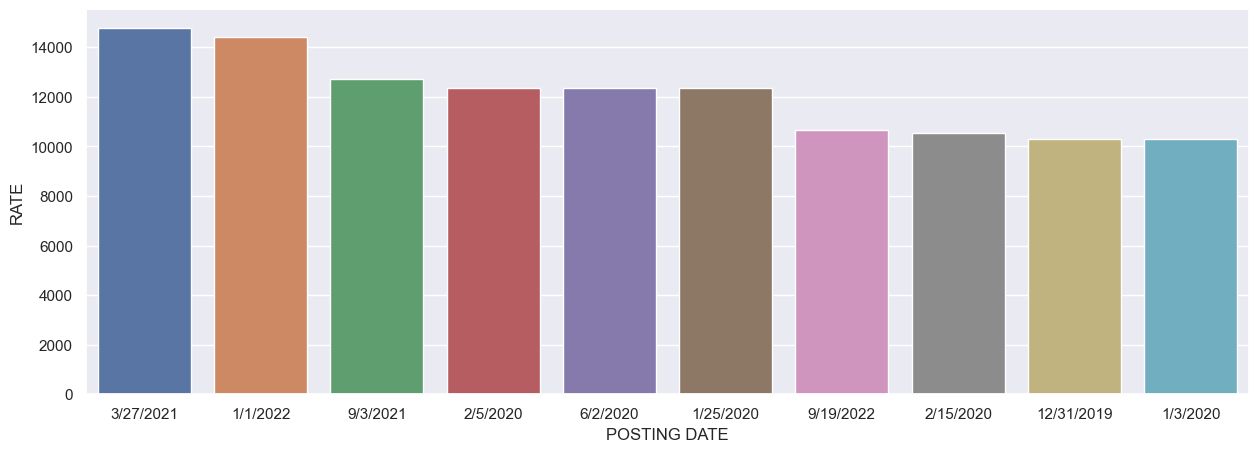

In [125]:
sales_state = df.groupby(['POSTING DATE'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='POSTING DATE',y = 'RATE')

In [ ]:
From above graph we can see that more sales over time on 27th march 2021.

### Create Date

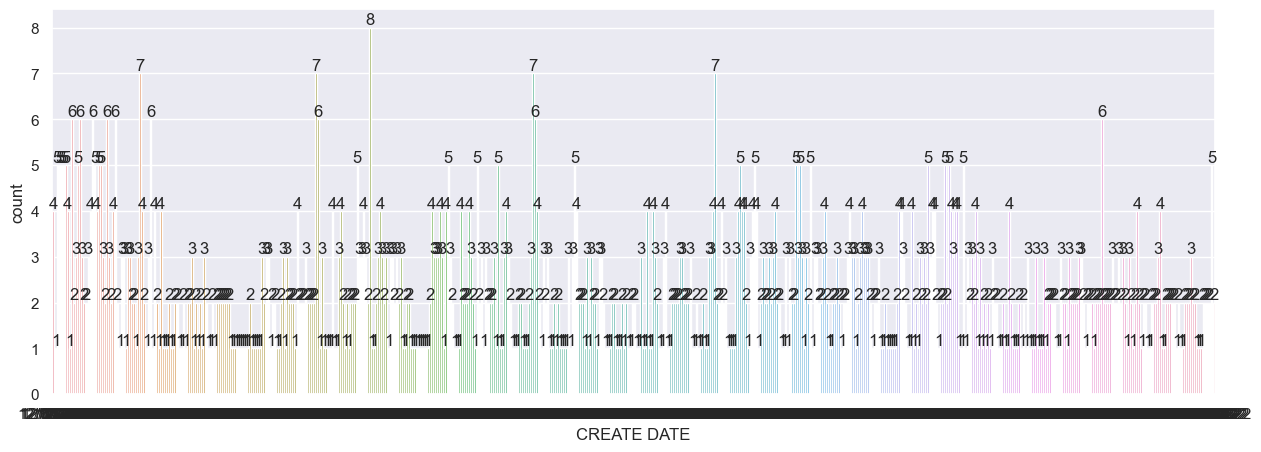

In [128]:
ax = sns.countplot(x = 'CREATE DATE',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='CREATE DATE', ylabel='RATE'>

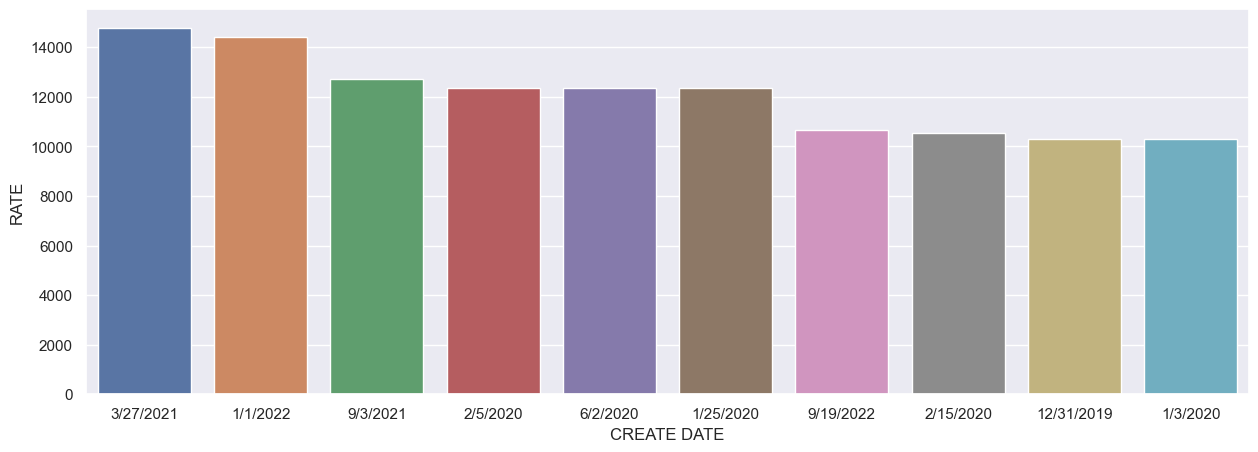

In [129]:
sales_state = df.groupby(['CREATE DATE'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='CREATE DATE',y = 'RATE')

### EFFECTIVE DATE

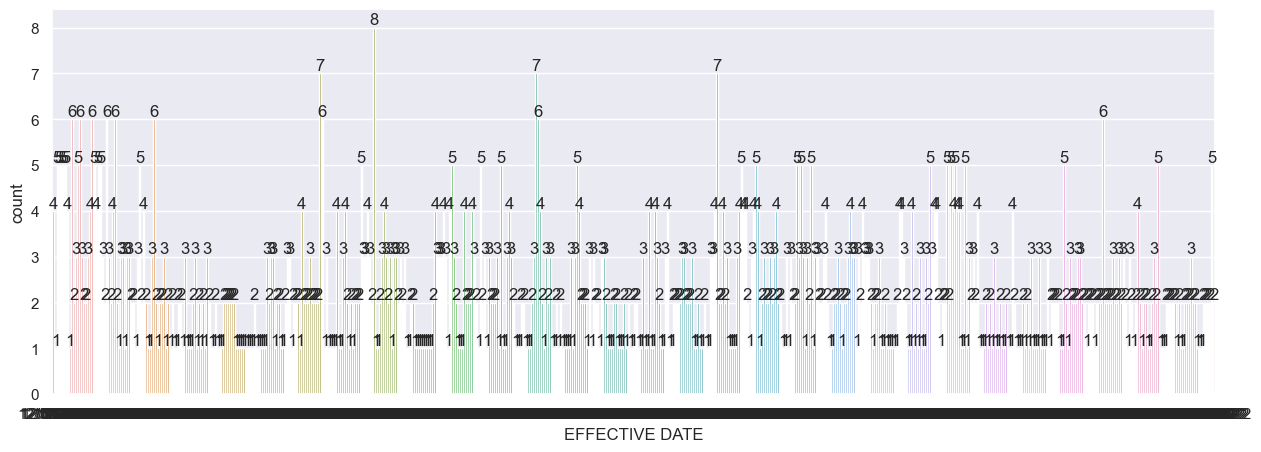

In [130]:
ax = sns.countplot(x = 'EFFECTIVE DATE',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='EFFECTIVE DATE', ylabel='RATE'>

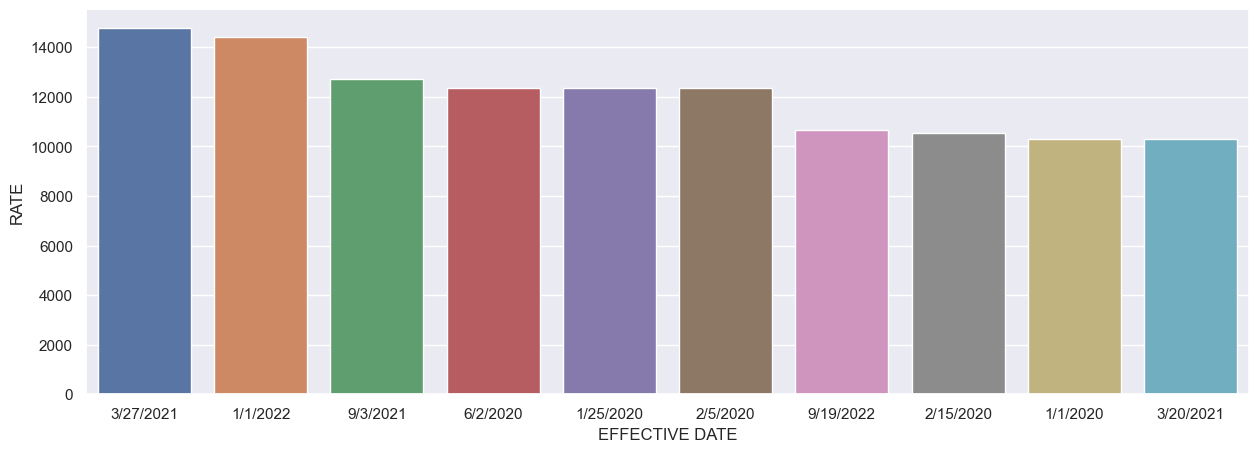

In [131]:
sales_state = df.groupby(['EFFECTIVE DATE'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='EFFECTIVE DATE',y = 'RATE')

### OPERATIONAL PERFORMANCE

### QUANTITY

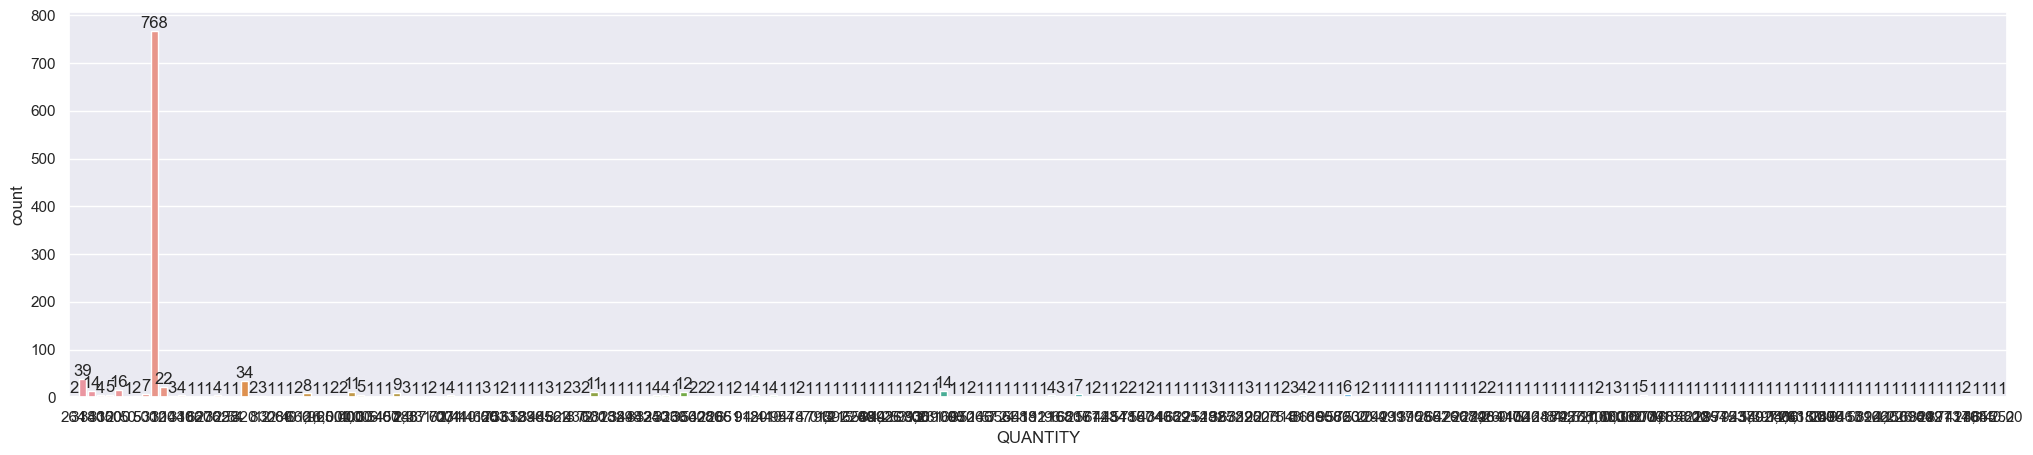

In [134]:
ax = sns.countplot(x = 'QUANTITY',data = df)
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='QUANTITY', ylabel='RATE'>

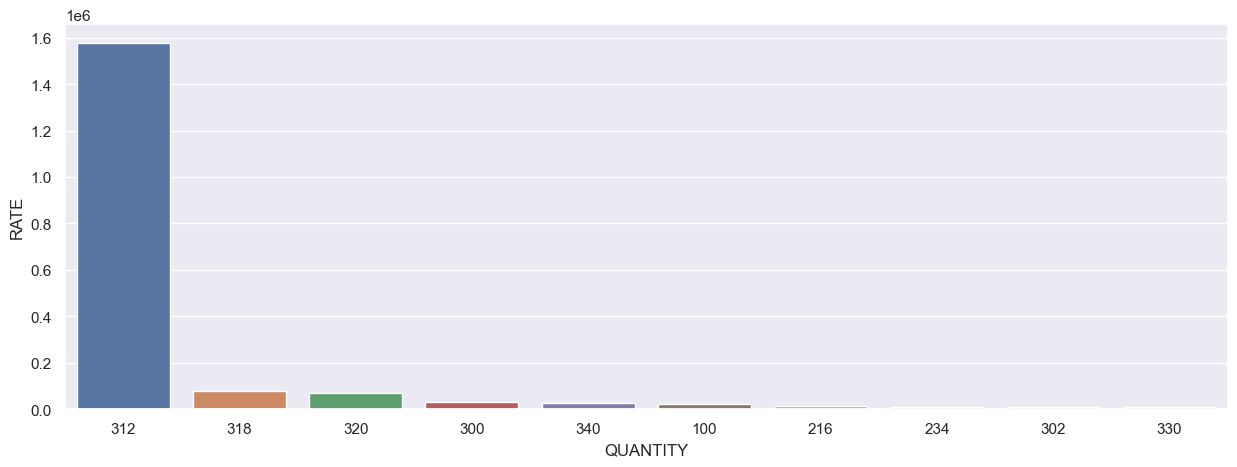

In [135]:
sales_state = df.groupby(['QUANTITY'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='QUANTITY',y = 'RATE')

### U_Frt

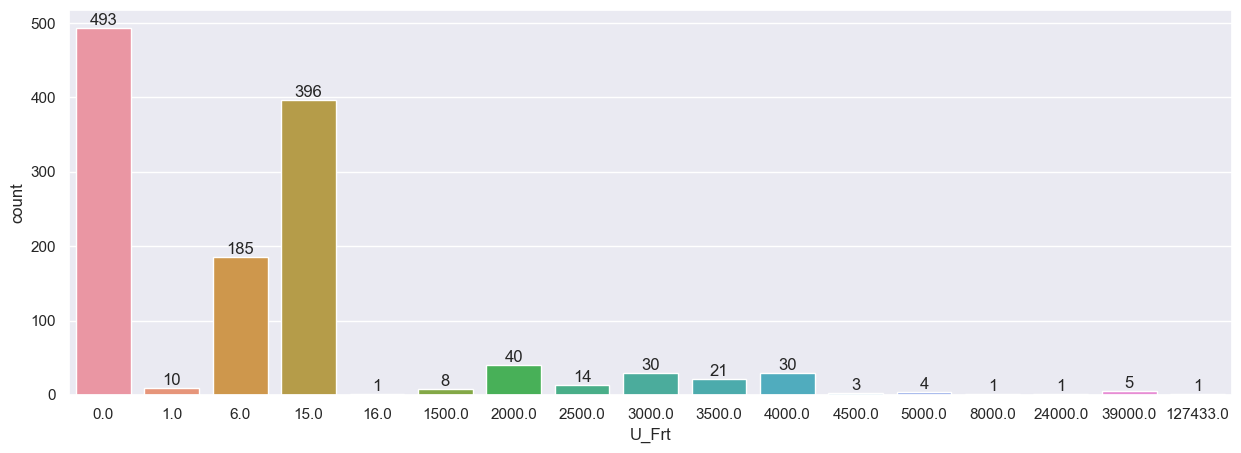

In [136]:
ax = sns.countplot(x = 'U_Frt',data = df)
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='U_Frt', ylabel='RATE'>

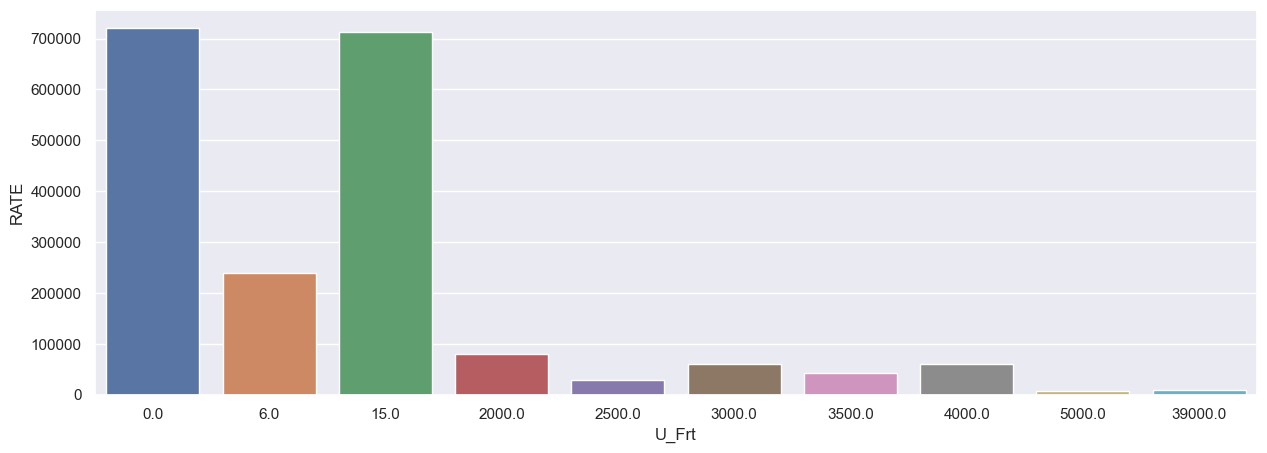

In [137]:
sales_state = df.groupby(['U_Frt'],as_index=False)['RATE'].sum().sort_values(by = 'RATE',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='U_Frt',y = 'RATE')

### Conclusion

In [ ]:
The exploratory data analysis reveals that the majority of sales come from Wooden Pallet products and that customer transport
generates the highest revenue among transporters. The warehouse “Company India Kanera” is the top-performing location. 
The data also shows peak sales activity around March 27, 2021. These insights can help focus optimization efforts on 
high-performing categories and periods.

